***최종 수치: 0.856***

**0. Getting Ready**

In [0]:
from keras.datasets import imdb
import numpy as np
from keras import models
from keras import layers
#selecting top-1000 words in thet train,test data 
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words= 10000)

In [69]:
train_data[0][:10] #represents each review as a list of word indices 


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

**1. Using one-hot encoding**

In [0]:
#one-hot encoding function define 
def vectorize_sequences(seq, dimension = 10000):
  results = np.zeros((len(seq), dimension)) #create a np array of (length of sequence, dimension of 10000)
  for i, sequence in enumerate(seq):
    
    results[i,sequence] = 1 
    
    
  return results 

In [71]:
#encode train/test data into one-hot encoding shape 
x_train =vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

x_test[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [72]:
#change train/test y labels to 0,1 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

y_test[:5] #0 is negative 

array([0., 1., 1., 0., 1.], dtype=float32)

In [73]:
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (10000,))) #input layer :needs specific input_shape 
model.add(layers.Dense(16,activation='relu')) #hidden layer using relu 
model.add(layers.Dense(1,activation = 'sigmoid')) #output layer: using sigmoid 

model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics =['accuracy']) 


#dividing the train data into validation sets
x_val= x_train[:10000]
partial_x_train = x_train[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]

history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size= 512, validation_data = (x_val, y_val))
#train with partial data of train, validate with the validtaion data 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 139us/step - loss: 0.5041 - accuracy: 0.7953 - val_loss: 0.3835 - val_accuracy: 0.8638
Epoch 2/20
15000/15000 [==============================] - 2s 127us/step - loss: 0.3014 - accuracy: 0.9049 - val_loss: 0.3020 - val_accuracy: 0.8870
Epoch 3/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2223 - accuracy: 0.9253 - val_loss: 0.2753 - val_accuracy: 0.8914
Epoch 4/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1675 - accuracy: 0.9451 - val_loss: 0.2755 - val_accuracy: 0.8889
Epoch 5/20
15000/15000 [==============================] - 2s 123us/step - loss: 0.1371 - accuracy: 0.9557 - val_loss: 0.2853 - val_accuracy: 0.8881
Epoch 6/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.1141 - accuracy: 0.9648 - val_loss: 0.3038 - val_accuracy: 0.8844
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [74]:
results = model.evaluate(x_test, y_test)
print(results) #accuracy: 0.84

25000/25000 [==============================] - 2s 64us/step
[0.7850500724077225, 0.8503199815750122]


In [75]:
#visualization
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

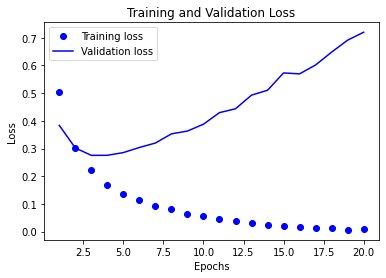

In [77]:
plt.plot(epochs,loss,'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show() #shows that overfitting is occuring around epochs of 5

**2. Using tf-idf**

In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(lowercase=False, token_pattern=r'\S+')



In [0]:
train_word_data = []

for lists in train_data:

  temp_sentence = ""
  for element in lists:

    temp_sentence += str(element) + " "

  train_word_data.append(temp_sentence)

train_word_data[0]#make the data as a word (by strings) and append in each list 
#now is a list of strings 

test_word_data = []

for lists in test_data:

  temp_sentence = ""
  for element in lists:

    temp_sentence += str(element) + " "

  test_word_data.append(temp_sentence)


In [80]:
len(train_word_data) 
len(train_data) #both list of 25000

25000

In [0]:
#use the vectorizer -use train data for the vectorizer data 
train_vector_tfidf = tfidf.fit_transform(train_word_data) #the train data is list in lists (each list has words inside)
# tfidf.vocabulary_#we now can see the vocabulary (don't know which word is which index but know the occurence of the word in the train data )

In [0]:
#transform with the test data 
test_vector_tfidf = tfidf.transform(test_word_data)

In [0]:
#both labels has 25000 labels and the tdidf transformed data has 25000 each too 
train_labels.shape
test_labels.shape
test_vector_tfidf.shape #has 9998 words 

#now we have the train/test data in arrays ; fit to model 
tfidf_test_data = test_vector_tfidf.toarray() 
tfidf_train_data = train_vector_tfidf.toarray()


In [84]:
#fit the model 
model = models.Sequential()

model.add(layers.Dense(16, activation = 'relu', input_shape = (9998,))) #input layer :needs specific input_shape 
model.add(layers.Dense(16,activation='relu')) #hidden layer using relu 
model.add(layers.Dense(1,activation = 'sigmoid')) #output layer: using sigmoid 

model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics =['accuracy']) 


#dividing the train data into validation sets
x_val_tfidf= tfidf_train_data[:10000] #word by word tfidf score is now the elements of the dataset 
partial_x_train = tfidf_train_data[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]

history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size= 512, validation_data = (x_val_tfidf, y_val))
#train with partial data of train, validate with the validtaion data 
results2 = model.evaluate(tfidf_test_data, y_test)
print(results2) #get the accuracy using tfidf 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 119us/step - loss: 0.6466 - accuracy: 0.7829 - val_loss: 0.5951 - val_accuracy: 0.8488
Epoch 2/20
15000/15000 [==============================] - 2s 110us/step - loss: 0.5378 - accuracy: 0.8826 - val_loss: 0.4993 - val_accuracy: 0.8680
Epoch 3/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.4327 - accuracy: 0.8993 - val_loss: 0.4129 - val_accuracy: 0.8760
Epoch 4/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.3421 - accuracy: 0.9108 - val_loss: 0.3484 - val_accuracy: 0.8855
Epoch 5/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2738 - accuracy: 0.9230 - val_loss: 0.3050 - val_accuracy: 0.8883
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2256 - accuracy: 0.9347 - val_loss: 0.2808 - val_accuracy: 0.8943
Epoch 7/20
15000/15000 [==============================] - 2s 1

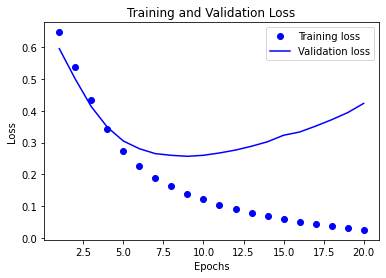

In [85]:
#visualization
history_dict = history.history
history_dict.keys()
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show() 

In [86]:
#results from one-hot encoding and tfidf 
print('The result from one-hot encoding is...  ' + str(results[1]))
print('The result from tfidf is...  ' +str(results2[1]))
print('The result has enhanced by 0.01')

The result from one-hot encoding is...  0.8503199815750122
The result from tfidf is...  0.8533999919891357
The result has enhanced by 0.01


**3. Using different hidden layer number: adding one more layer, different units of layers**




In [87]:
#fit the model 
model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (9998,)))
model.add(layers.Dense(16,activation='relu')) #hidden layer using relu 
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1,activation = 'sigmoid')) #output layer: using sigmoid since we are finding whether pos,neg

model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics =['accuracy']) 


#dividing the train data into validation sets
x_val_tfidf= tfidf_train_data[:10000] #word by word tfidf score is now the elements of the dataset 
partial_x_train = tfidf_train_data[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]

history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size= 512, validation_data = (x_val_tfidf, y_val))
#train with partial data of train, validate with the validtaion data 
results3 = model.evaluate(tfidf_test_data, y_test)
print(results3) #get the accuracy using tfidf 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.6329 - accuracy: 0.8045 - val_loss: 0.5509 - val_accuracy: 0.8709
Epoch 2/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.4577 - accuracy: 0.9007 - val_loss: 0.4036 - val_accuracy: 0.8776
Epoch 3/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.3098 - accuracy: 0.9189 - val_loss: 0.3087 - val_accuracy: 0.8943
Epoch 4/20
15000/15000 [==============================] - 2s 124us/step - loss: 0.2179 - accuracy: 0.9368 - val_loss: 0.2685 - val_accuracy: 0.8965
Epoch 5/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1656 - accuracy: 0.9502 - val_loss: 0.2577 - val_accuracy: 0.8947
Epoch 6/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.1280 - accuracy: 0.9610 - val_loss: 0.2648 - val_accuracy: 0.8922
Epoch 7/20
15000/15000 [==============================] - 2s 1

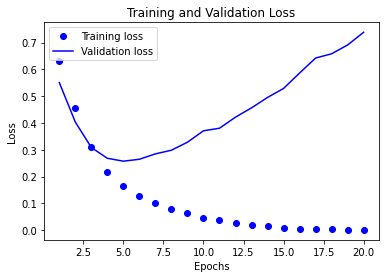

In [88]:
#visualization of the results above 
history_dict = history.history
history_dict.keys()
acc= history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
plt.plot(epochs,loss,'bo', label = 'Training loss')
plt.plot(epochs, val_loss,'b',label = 'Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.legend()
plt.show() 

In [89]:
#results from one-hot encoding and tfidf and difference in layers 
print('The result from one-hot encoding is...  ' + str(results[1]))
print('The result from tfidf is...  ' +str(results2[1]))
print('The result from difference in layers is..' + str(results3[1]))

The result from one-hot encoding is...  0.8503199815750122
The result from tfidf is...  0.8533999919891357
The result from difference in layers is..0.8389999866485596


**4. Using tanh activation**

In [90]:
#fit the model 
model = models.Sequential()

model.add(layers.Dense(16, activation = 'tanh', input_shape = (9998,))) #input layer :needs specific input_shape 
model.add(layers.Dense(16,activation='relu')) #hidden layer using relu 
model.add(layers.Dense(1,activation = 'sigmoid')) #output layer: using sigmoid 

model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics =['accuracy']) 


#dividing the train data into validation sets
x_val_tfidf= tfidf_train_data[:10000] #word by word tfidf score is now the elements of the dataset 
partial_x_train = tfidf_train_data[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]

history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size= 512, validation_data = (x_val_tfidf, y_val))
#train with partial data of train, validate with the validtaion data 
results4 = model.evaluate(tfidf_test_data, y_test)
print(results4) #get the accuracy using tfidf 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.6479 - accuracy: 0.7607 - val_loss: 0.6017 - val_accuracy: 0.8341
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.5427 - accuracy: 0.8652 - val_loss: 0.5060 - val_accuracy: 0.8569
Epoch 3/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.4399 - accuracy: 0.8897 - val_loss: 0.4208 - val_accuracy: 0.8699
Epoch 4/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.3519 - accuracy: 0.9030 - val_loss: 0.3585 - val_accuracy: 0.8744
Epoch 5/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2850 - accuracy: 0.9155 - val_loss: 0.3114 - val_accuracy: 0.8877
Epoch 6/20
15000/15000 [==============================] - 2s 102us/step - loss: 0.2346 - accuracy: 0.9281 - val_loss: 0.2832 - val_accuracy: 0.8925
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [91]:
#results from one-hot encoding and tfidf and difference in layers 
print('The result from one-hot encoding is...  ' + str(results[1]))
print('The result from tfidf is...  ' +str(results2[1]))
print('The result from difference in layers is..' + str(results3[1]))
print('The result from difference in activation function is..' + str(results4[1]))

The result from one-hot encoding is...  0.8503199815750122
The result from tfidf is...  0.8533999919891357
The result from difference in layers is..0.8389999866485596
The result from difference in activation function is..0.8523200154304504


**5. Using mse loss function**

In [92]:
#fit the model 
model = models.Sequential()

model.add(layers.Dense(16, activation = 'tanh', input_shape = (9998,))) #input layer :needs specific input_shape 
model.add(layers.Dense(16,activation='relu')) #hidden layer using relu 
model.add(layers.Dense(1,activation = 'sigmoid')) #output layer: using sigmoid 

model.compile(optimizer = 'rmsprop', loss= 'mse', metrics =['accuracy']) 


#dividing the train data into validation sets
x_val_tfidf= tfidf_train_data[:10000] #word by word tfidf score is now the elements of the dataset 
partial_x_train = tfidf_train_data[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]

history= model.fit(partial_x_train, partial_y_train, epochs=20, batch_size= 512, validation_data = (x_val_tfidf, y_val))
#train with partial data of train, validate with the validtaion data 
results5 = model.evaluate(tfidf_test_data, y_test)
print(results5) #get the accuracy using tfidf 

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.2302 - accuracy: 0.7896 - val_loss: 0.2100 - val_accuracy: 0.8131
Epoch 2/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1862 - accuracy: 0.8690 - val_loss: 0.1708 - val_accuracy: 0.8586
Epoch 3/20
15000/15000 [==============================] - 1s 100us/step - loss: 0.1449 - accuracy: 0.8887 - val_loss: 0.1379 - val_accuracy: 0.8712
Epoch 4/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.1112 - accuracy: 0.9036 - val_loss: 0.1135 - val_accuracy: 0.8806
Epoch 5/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0875 - accuracy: 0.9169 - val_loss: 0.0981 - val_accuracy: 0.8895
Epoch 6/20
15000/15000 [==============================] - 2s 101us/step - loss: 0.0706 - accuracy: 0.9300 - val_loss: 0.0882 - val_accuracy: 0.8935
Epoch 7/20
15000/15000 [==============================] - 2s 1

In [93]:
#results from one-hot encoding and tfidf and difference in layers 
print('The result from one-hot encoding is...  ' + str(results[1]))
print('The result from tfidf is...  ' +str(results2[1]))
print('The result from difference in layers is..' + str(results3[1]))
print('The result from difference in activation function is..' + str(results4[1]))
print('The result from difference in loss function is..' + str(results5[1]))

The result from one-hot encoding is...  0.8503199815750122
The result from tfidf is...  0.8533999919891357
The result from difference in layers is..0.8389999866485596
The result from difference in activation function is..0.8523200154304504
The result from difference in loss function is..0.856440007686615


In [94]:
#fit the model 
model = models.Sequential()

model.add(layers.Dense(16, activation = 'tanh', input_shape = (9998,))) #input layer :needs specific input_shape 
model.add(layers.Dense(16,activation='relu')) #hidden layer using relu 
model.add(layers.Dense(1,activation = 'sigmoid')) #output layer: using sigmoid 

model.compile(optimizer = 'rmsprop', loss= 'binary_crossentropy', metrics =['accuracy']) 


#dividing the train data into validation sets
x_val_tfidf= tfidf_train_data[:10000] #word by word tfidf score is now the elements of the dataset 
partial_x_train = tfidf_train_data[10000:]
y_val= y_train[:10000]
partial_y_train= y_train[10000:]

history= model.fit(partial_x_train, partial_y_train, epochs=30, batch_size= 512, validation_data = (x_val_tfidf, y_val))
#train with partial data of train, validate with the validtaion data 
results6 = model.evaluate(tfidf_test_data, y_test)
print(results6) #get the accuracy using tfidf 

Train on 15000 samples, validate on 10000 samples
Epoch 1/30
15000/15000 [==============================] - 2s 107us/step - loss: 0.6397 - accuracy: 0.7659 - val_loss: 0.5836 - val_accuracy: 0.8322
Epoch 2/30
15000/15000 [==============================] - 2s 101us/step - loss: 0.5175 - accuracy: 0.8679 - val_loss: 0.4776 - val_accuracy: 0.8574
Epoch 3/30
15000/15000 [==============================] - 2s 101us/step - loss: 0.4077 - accuracy: 0.8901 - val_loss: 0.3943 - val_accuracy: 0.8697
Epoch 4/30
15000/15000 [==============================] - 1s 100us/step - loss: 0.3221 - accuracy: 0.9082 - val_loss: 0.3345 - val_accuracy: 0.8799
Epoch 5/30
15000/15000 [==============================] - 1s 100us/step - loss: 0.2596 - accuracy: 0.9216 - val_loss: 0.2961 - val_accuracy: 0.8905
Epoch 6/30
15000/15000 [==============================] - 2s 102us/step - loss: 0.2142 - accuracy: 0.9327 - val_loss: 0.2754 - val_accuracy: 0.8886
Epoch 7/30
15000/15000 [==============================] - 2s 1

In [95]:
#results from one-hot encoding and tfidf and difference in layers 
print('The result from one-hot encoding is...  ' + str(results[1]))
print('The result from tfidf is...  ' +str(results2[1]))
print('The result from difference in layers is..' + str(results3[1]))
print('The result from difference in activation function is..' + str(results4[1]))
print('The result from difference in loss function is..' + str(results5[1]))
print('The result from difference in epoch is..' + str(results6[1]))

The result from one-hot encoding is...  0.8503199815750122
The result from tfidf is...  0.8533999919891357
The result from difference in layers is..0.8389999866485596
The result from difference in activation function is..0.8523200154304504
The result from difference in loss function is..0.856440007686615
The result from difference in epoch is..0.8375999927520752


**THE BEST FUNCTION IS...**

In [97]:
print('The best result from difference in loss function is..' + str(results5[1]))

The best result from difference in loss function is..0.856440007686615
